In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types

In [32]:
customer_data=pd.read_csv("Customer_Data.csv")
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [36]:
product_data=pd.read_csv("Product_Data.csv",sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [37]:
transaction_data=pd.read_csv("transaction_data.csv",sep='|')
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [5]:
customer_data.shape

(500, 9)

In [6]:
product_data.shape

(30, 1)

In [7]:
transaction_data.shape

(10000, 1)

In [8]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [9]:
product_data.dtypes

PRODUCT CODE|PRODUCT CATEGORY|UNIT LIST PRICE    object
dtype: object

In [10]:
transaction_data.dtypes

CUSTOMER NUM|PRODUCT NUM|QUANTITY PURCHASED|DISCOUNT TAKEN|TRANSACTION DATE|STOCKOUT    object
dtype: object

In [11]:
type(customer_data)

pandas.core.frame.DataFrame

In [12]:
type(customer_data.AGE)

pandas.core.series.Series

In [13]:
customer_data["INCOME"]=customer_data["INCOME"].map(lambda x : x.replace ("$"," "))

In [14]:
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"51,498",3,notenrolled,NaN,1,Single


In [15]:
customer_data["INCOME"]=customer_data["INCOME"].map(lambda x : int(x.replace(",","")))

In [16]:
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single
4,10005,0,30,51498,3,notenrolled,NaN,1,Single


In [17]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [18]:
from datetime import datetime
customer_data["ENROLLMENT DATE"] = \
customer_data["ENROLLMENT DATE"][customer_data["ENROLLMENT DATE"] .notnull()].map(lambda x : datetime.strptime(x, '%d-%m-%Y'))

In [19]:
customer_data.describe()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,HOUSEHOLD SIZE
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10250.500000,0.498000,42.316000,85792.482000,6.554000,2.894000
std,144.481833,0.500497,17.567509,37157.766304,2.497912,1.597457
min,10001.000000,0.000000,18.000000,20256.000000,1.000000,1.000000
25%,10125.750000,0.000000,30.000000,52429.000000,5.000000,2.000000
50%,10250.500000,0.000000,39.000000,86846.500000,7.000000,3.000000
75%,10375.250000,1.000000,50.250000,118381.000000,9.000000,4.000000
max,10500.000000,1.000000,90.000000,149999.000000,10.000000,6.000000


In [20]:
customer_data["MARITAL STATUS"] .unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [21]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

In [22]:
print('transaction data is null?',transaction_data.isnull().values.any())
print('customer data is null?',customer_data.isnull().values.any())
print('product data is null?',product_data.isnull().values.any())

transaction data is null? False
customer data is null? True
product data is null? False


In [23]:
customer_data.columns[customer_data.isna().any()].to_list()

['ENROLLMENT DATE']

In [24]:
import matplotlib.pyplot as plt

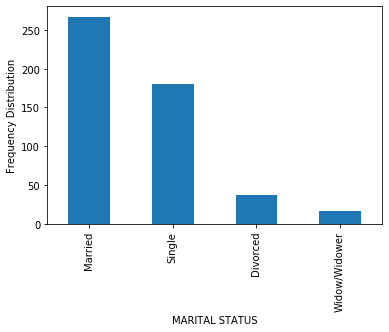

In [25]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("MARITAL STATUS")
plt.ylabel("Frequency Distribution")
plt.show()

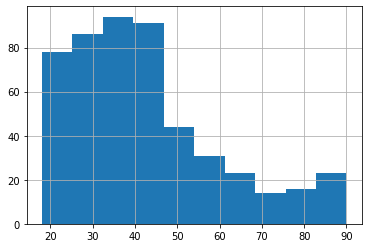

In [27]:
customer_data["AGE"].hist(bins=10)
plt.show()

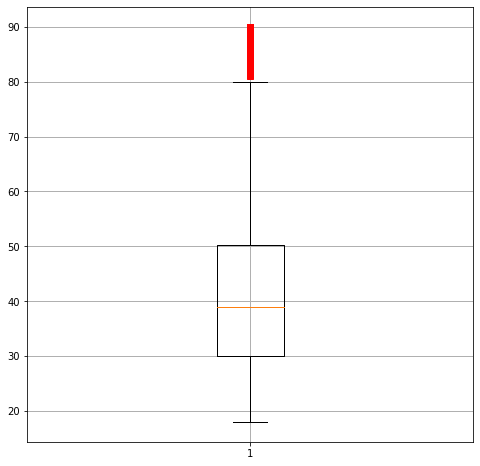

In [28]:
plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid(linestyle='-',linewidth=1)
plt.show()

In [30]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

In [40]:
trans_product=transaction_data.merge(product_data, how='inner',left_on='PRODUCT NUM',right_on='PRODUCT CODE')
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [41]:
trans_product["UNIT LIST PRICE"]=trans_product["UNIT LIST PRICE"].map(lambda x: float(x .replace("$", " ")))

In [42]:
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [43]:
trans_product["TOTAL PRICE"]=trans_product["QUANTITY PURCHASED"]*trans_product["UNIT LIST PRICE"]*(1-trans_product["DISCOUNT TAKEN"])
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [48]:
income_by_product = trans_product.groupby("PRODUCT CATEGORY").agg({"TOTAL PRICE":sum}).sort_values("TOTAL PRICE",ascending=False)
income_by_product

,TOTAL PRICE
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [51]:
revenue_by_product=income_by_product.rename(columns={'TOTAL PRICE':'REVENUE PER PRODUCT'})

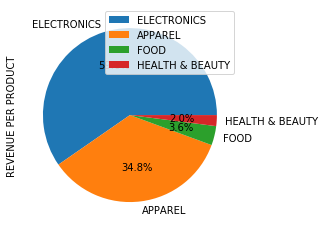

In [56]:
revenue_by_product["REVENUE PER PRODUCT"].plot(kind='pie',autopct='%1.1f%%',legend=True)

In [70]:
customer_product_categ=trans_product.groupby(["CUSTOMER NUM","PRODUCT CATEGORY"]).agg({"TOTAL PRICE":"sum"})
customer_product_categ.head()

TOTAL PRICE
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [71]:
customer_product_categ.columns

Index(['TOTAL PRICE'], dtype='object')

In [72]:
customer_product_categ.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [73]:
customer_product_categ=customer_product_categ.reset_index()

In [74]:
customer_pivot=customer_product_categ.pivot(index="CUSTOMER NUM",columns="PRODUCT CATEGORY", values="TOTAL PRICE")
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [78]:
trans_product["TRANSACTION DATE"]=trans_product["TRANSACTION DATE"].map(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [89]:
recent_trans_total_spent=trans_product.groupby("CUSTOMER NUM").\
agg({'TRANSACTION DATE':'max','TOTAL PRICE':'sum'}).\
rename(columns={"TRANSACTION DATE":"RECENT TRANSACTION","TOTAL PRICE":"TOTAL SPENT"})
recent_trans_total_spent.head()

,RECENT TRANSACTION,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [93]:
customer_KPIs =customer_pivot.merge(recent_trans_total_spent, how='inner', left_index=True, right_index=True)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [94]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [102]:
customer_all_view=customer_data.merge(customer_KPIs, how='inner',left_on='CUSTOMERID',right_index=True)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION,TOTAL SPENT
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [103]:
table=pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


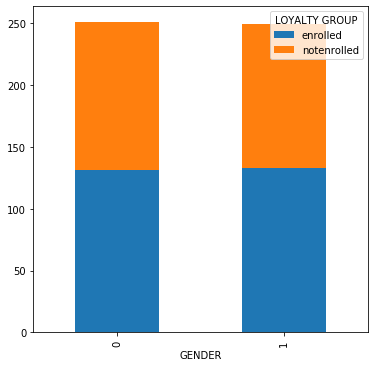

In [107]:
table.plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()

In [108]:
table=pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


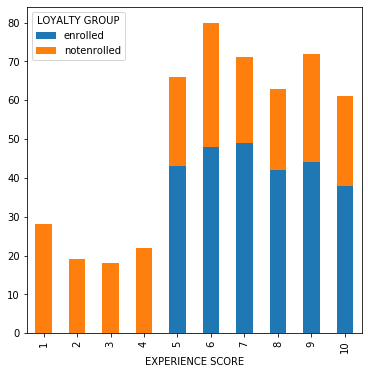

In [109]:
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show()

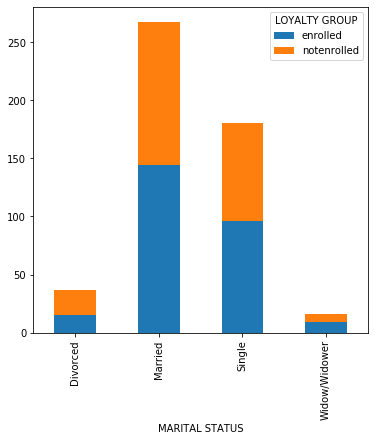

In [110]:
table=pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show()

In [111]:
customer_all_view['AGE BINNED']=pd.cut(customer_all_view['AGE'],10)
customer_all_view['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

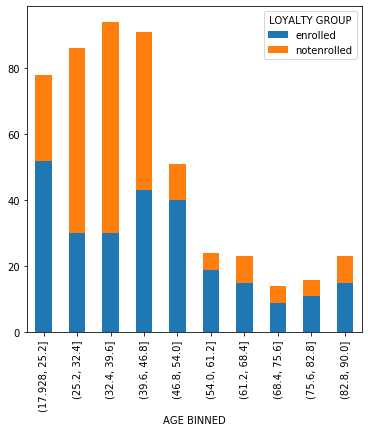

In [112]:
table=pd.crosstab(customer_all_view['AGE BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

In [115]:
customer_all_view.groupby('LOYALTY GROUP').agg({'AGE':'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


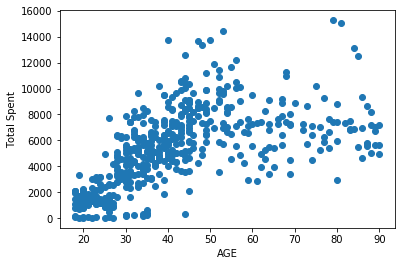

In [117]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel('AGE')
plt.ylabel('Total Spent')
plt.show()

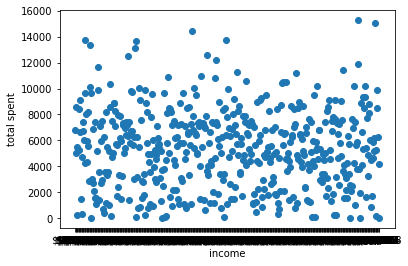

In [124]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel('income')
plt.ylabel('total spent')
plt.show()

In [125]:
table=customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()
table

,EXPERIENCE SCORE,TOTAL SPENT
0,1,3911.019036
1,2,4410.997842
2,3,3395.602222
3,4,4257.461455
4,5,6097.330864
5,6,5398.145675
6,7,5816.187268
7,8,5804.105016
8,9,5771.192042
9,10,5217.369574


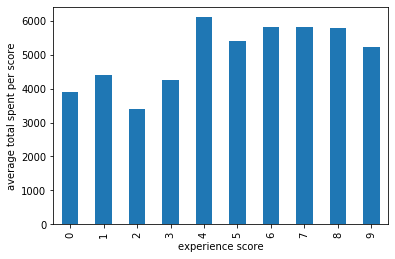

In [126]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel('experience score')
plt.ylabel('average total spent per score')
plt.show()

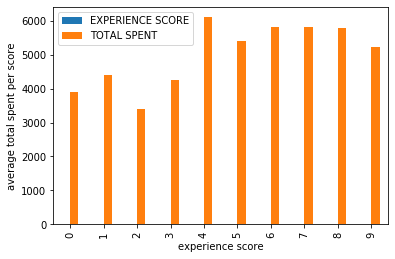

In [127]:
table.plot(kind='bar')
plt.xlabel('experience score')
plt.ylabel('average total spent per score')
plt.show()

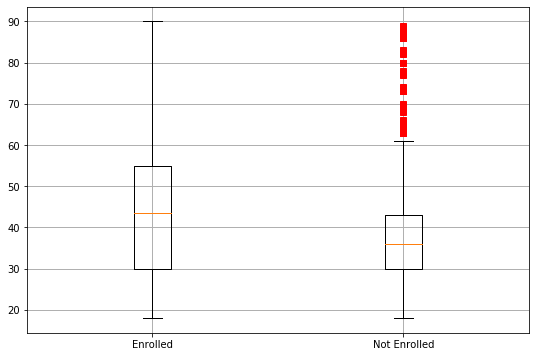

In [128]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "enrolled"]
plot2=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid( linestyle='-', linewidth=1)
plt.show()